# Naive Bayes algorithm

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Import data

In [2]:
# Read dataset
df = pd.read_csv('players.csv')
df.head()

,player;age;height;nationality;position;value;games;minutes;goals;assists;crosses;tackles;pressures;blocks;touches;fouls;fouled;offsides;own goals;ball recoveries;saves;squad;Season;league;Attendance;games starts;passes completed;sca;gca;dribbles completed;pens won;goals against gk;shots on target against;CLBestScorer;cards yellow;shots total;LgRk;MP;W;D;L;GF;GA;Pts;CL;WinCL
0,Zouhair Feddal;30;192;Morocco;Defender;4000000...
1,Zlatan Ibrahimović;37;195;Sweden;Forward;35000...
2,Zinedine Ferhat;26;180;Algeria;Forward;2000000...
3,Zinédine Ould Khaled;19;195;France;Midfield;15...
4,Zeki Celik;22;180;Turkey;Defender;20000000;23;...


# Preprocessing

## Get required data

In [13]:
# Get required data
import pandas as pd

# Read the dataset from CSV file with semicolon delimiter
df = pd.read_csv('players.csv', delimiter=';')

# Drop the specified columns
columns_to_drop = ['touches','blocks','pressures','tackles','crosses','value','fouled','own goals','ball recoveries','saves','squad','Season','league','Attendance','games starts', 'passes completed', 'sca', 'gca', 'dribbles completed', 'pens won', 'goals against gk', 'shots on target against', 'CLBestScorer', 'cards yellow', 'shots total', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'CL', 'WinCL']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,player,age,height,nationality,position,games,minutes,goals,assists,fouls,offsides
0,Zouhair Feddal,30,192.0,Morocco,Defender,17,1431,1,2,23,0
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,18,1362,10,5,30,20
2,Zinedine Ferhat,26,180.0,Algeria,Forward,26,2246,3,4,17,7
3,Zinédine Ould Khaled,19,195.0,France,Midfield,1,59,0,0,2,0
4,Zeki Celik,22,180.0,Turkey,Defender,23,2070,0,2,38,4


## Describe

In [14]:
# Describe data
df.describe()

,age,height,games,minutes,goals,assists,fouls,offsides
count,6824.000000,6823.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,25.429513,181.963506,19.031653,1342.866208,1.828693,1.261284,17.075909,2.735785
std,4.444391,9.529490,11.175267,972.311088,3.458147,2.021036,15.312556,5.440236
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,178.000000,9.000000,455.000000,0.000000,0.000000,4.000000,0.000000
50%,25.000000,183.000000,20.000000,1236.000000,0.000000,0.000000,14.000000,1.000000
75%,28.000000,187.000000,29.000000,2121.000000,2.000000,2.000000,26.000000,3.000000
max,41.000000,203.000000,38.000000,3420.000000,36.000000,21.000000,91.000000,56.000000


## Distribution

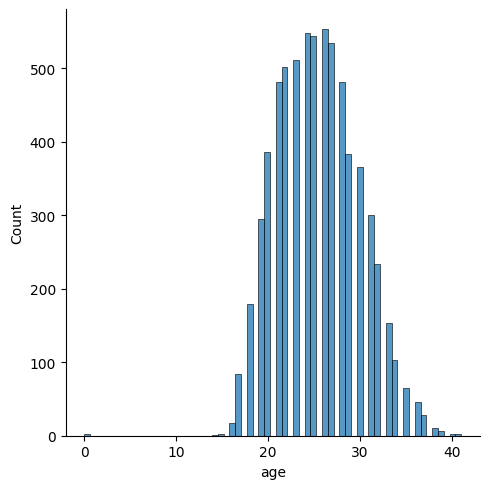

In [21]:
# Salary distribution
sns.displot(df['age'])

## Label encoding

In [26]:
# Label encoding
le = LabelEncoder()
df['age']= le.fit_transform(df['age'])

## Correlation matrix

In [5]:
# Correlation matrix
import pandas as pd

# Assuming 'df' is your DataFrame containing 'games' and 'goals' columns
correlation = df[['age','games', 'goals']].corr()
print(correlation)

KeyError: "None of [Index(['age', 'games', 'goals'], dtype='object')] are in the [columns]"

<Axes: >

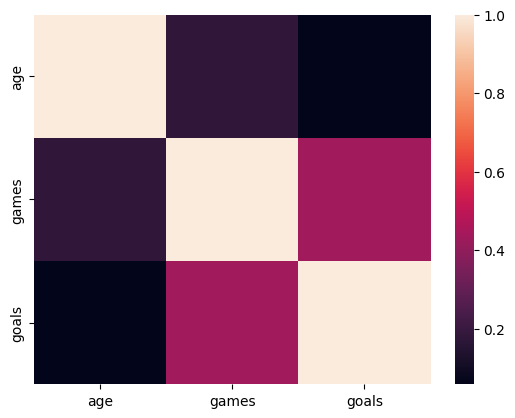

In [72]:
sns.heatmap(correlation)

## Drop insignificant data

In [73]:
# Drop Gender column
df.drop(columns=['nationality','position'], inplace=True)
df.head()

KeyError: "['nationality', 'position'] not found in axis"

## Relationship

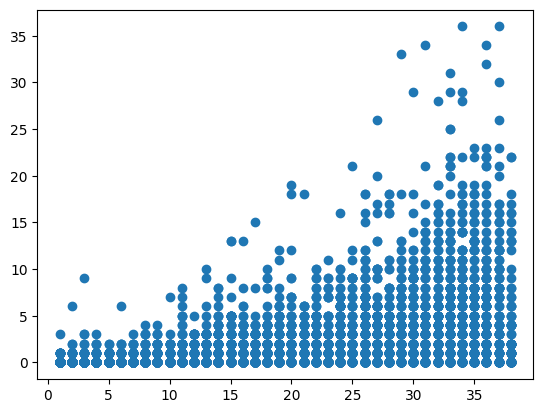

In [45]:
# Relationship between games and goals
plt.scatter(df['games'], df['goals'])

# Split data

## Independent/Dependent variables

In [89]:
import pandas as pd

# Assuming 'df' is your DataFrame
X = df.iloc[:, 6].values  # Select column 6 as independent variable
y = df.iloc[:, 8].values  # Select column 8 as dependent variable

## Train/Test sets

In [90]:
# Split data into Train/Test sets

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



# Feature scaling

In [94]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
sc = StandardScaler()

# Reshape X_train and X_test to 2D arrays if needed
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Scale the independent variables in the training set
X_train = sc.fit_transform(X_train)

# Scale the independent variables in the testing set
X_test = sc.transform(X_test)


# Train model

In [95]:
# Train Bayes-Theorem model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Predict result / Score model

In [96]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 3]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 1]]


# Evaluate model

## Accuracy

In [97]:
# Accuracy
accuracy_score(y_test, y_pred)

0.3950762016412661

## Classification report

In [98]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.77      0.67       829
           1       0.22      0.08      0.12       299
           2       0.10      0.04      0.06       139
           3       0.14      0.05      0.07        86
           4       0.00      0.00      0.00        71
           5       0.00      0.00      0.00        46
           6       0.00      0.00      0.00        30
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         7
   

c:\Users\MC\Desktop\pandas_project\my_venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MC\Desktop\pandas_project\my_venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MC\Desktop\pandas_project\my_venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

## F1 score

In [105]:
from sklearn.metrics import f1_score

# Assuming 'y_test' contains the true labels and 'y_pred' contains the predicted labels
f1 = f1_score(y_test, y_pred, average='micro')
print(f"F1 Score (Micro): {f1}")

F1 Score (Micro): 0.3950762016412661


## Confusion matrix

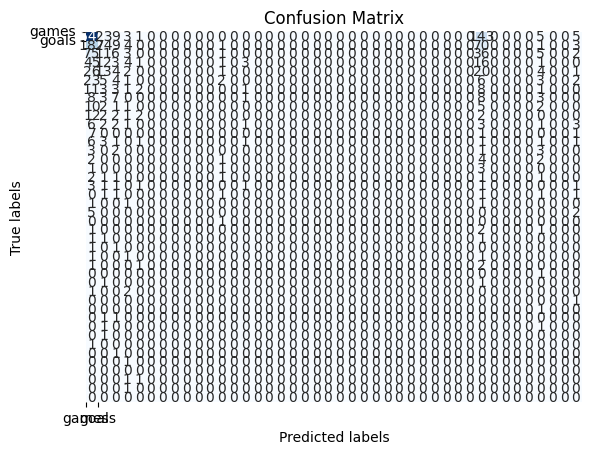

In [109]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


# Add labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['games', 'goals'])
plt.yticks(ticks=[0, 1], labels=['games', 'goals'])

# Display the plot
plt.show()


## Precision-Recall curve

c:\Users\MC\Desktop\pandas_project\my_venv\Lib\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\MC\Desktop\pandas_project\my_venv\Lib\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


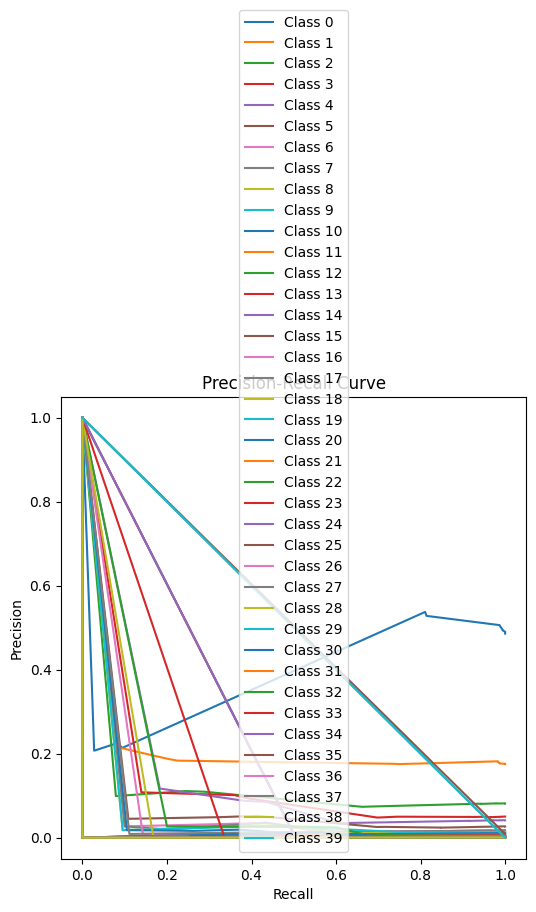

In [121]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the true labels and 'y_pred_proba' contains the predicted probabilities for each class
precision = dict()
recall = dict()
thresholds = dict()

# Compute precision and recall for each class
num_classes = len(np.unique(y_test))
for class_label in range(num_classes):
    precision[class_label], recall[class_label], thresholds[class_label] = precision_recall_curve((y_test == class_label).astype(int), y_pred_proba)

# Plot precision-recall curves for each class
fig, ax = plt.subplots(figsize=(6, 6))
for class_label in range(num_classes):
    ax.plot(recall[class_label], precision[class_label], label=f'Class {class_label}')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend()

plt.show()

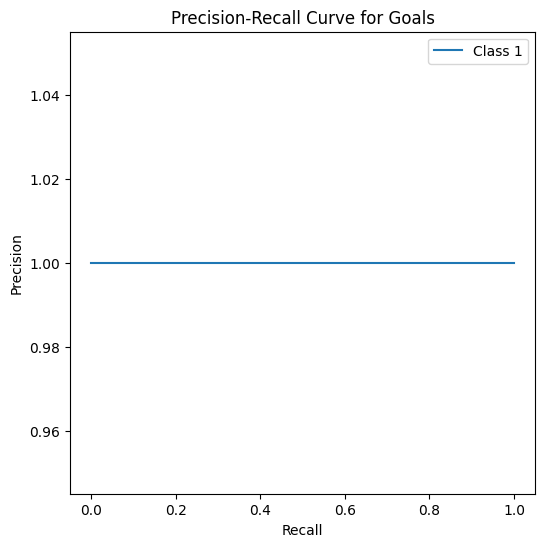

In [122]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the true labels for goals and 'y_pred_proba' contains the predicted probabilities for each game
precision = dict()
recall = dict()
thresholds = dict()

# Compute precision and recall for the positive class (goals)
positive_class_label = 1
positive_class_index = np.where(y_test == positive_class_label)[0]
precision[positive_class_label], recall[positive_class_label], thresholds[positive_class_label] = precision_recall_curve(y_test[positive_class_index], y_pred_proba[positive_class_index])

# Plot the precision-recall curve for the positive class
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall[positive_class_label], precision[positive_class_label], label=f'Class {positive_class_label}')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve for Goals')
ax.legend()

plt.show()

## AUC/ROC curve

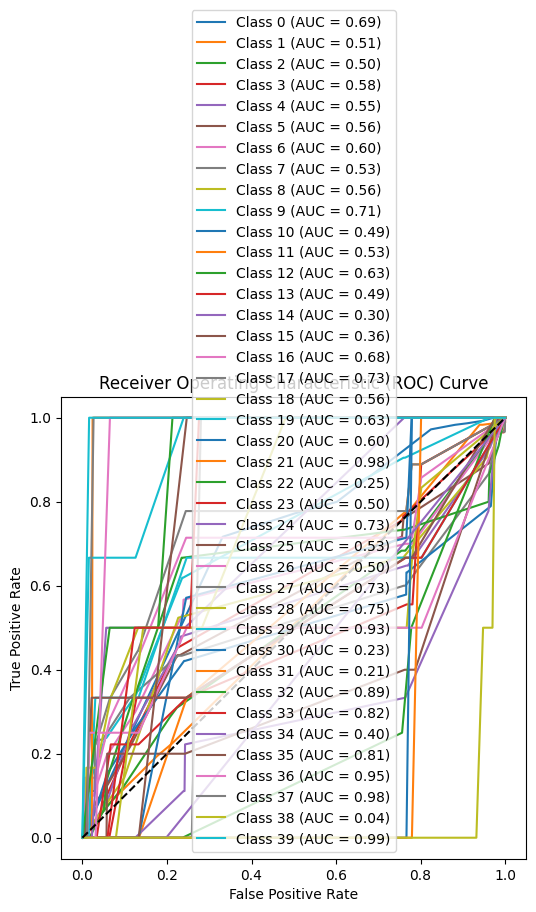

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming 'y_test' contains the true labels and 'classifier' is your trained classifier
n_classes = len(np.unique(y_test))
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = classifier.predict_proba(X_test)

for class_label in range(n_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binary[:, class_label], y_pred_proba[:, class_label])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curve for each class
fig, ax = plt.subplots(figsize=(6, 6))

for class_label in range(n_classes):
    ax.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' % (class_label, roc_auc[class_label]))

ax.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend()

plt.show()

# Visualize predictions

## Prediction on training set

In [141]:
# Visualize prediction results on training set

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('games')
plt.ylabel('goals')
plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1